# Import The DataSet and verify if the data has been loaded correctly.

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Rami\Desktop\Russia Real Estate 2018-2019.csv")
data.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2/19/2018,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2/27/2018,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2/28/2018,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,3/1/2018,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,3/1/2018,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


# Check the Dimensions ,Data Types ,Get Summary Statistics:

In [2]:
print(data.shape)
print('-------------------')
print(data.dtypes)
print('------------------')
data.describe()

(1048575, 13)
-------------------
price              int64
date              object
time              object
geo_lat          float64
geo_lon          float64
region             int64
building_type      int64
level              int64
levels             int64
rooms              int64
area             float64
kitchen_area     float64
object_type        int64
dtype: object
------------------


,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.885684e+06,5.377925e+01,5.516555e+01,4.623005e+03,1.906868e+00,6.035255e+00,1.103580e+01,1.815567e+00,5.384693e+01,1.046907e+01,4.128646e+00
std,1.881065e+07,4.628078e+00,2.100503e+01,3.530818e+03,1.043467e+00,4.812290e+00,6.293870e+00,9.289619e-01,2.691191e+01,1.245110e+01,4.636599e+00
min,-2.114150e+09,4.145909e+01,1.990393e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,1.000000e+00,3.000000e-02,1.000000e+00
25%,1.700000e+06,5.337108e+01,3.811678e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.900000e+01,7.000000e+00,1.000000e+00
50%,2.510000e+06,5.503949e+01,4.399402e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.840000e+01,9.300000e+00,1.000000e+00
75%,4.100000e+06,5.591667e+01,8.294513e+01,9.654000e+03,3.000000e+00,8.000000e+00,1.600000e+01,2.000000e+00,6.300000e+01,1.230000e+01,1.100000e+01
max,2.000000e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,9.000000e+00,4.444000e+03,9.999000e+03,1.100000e+01


# Handle Missing Values , Explore Categorical Variables

In [4]:
print(data.isnull().sum())
#data = data.drop(columns=['Unnamed: 13'])
print('----------------')
print(data['region'].value_counts())

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64
----------------
region
9654     266921
2843     127613
81       107989
3         74009
2661      65525
          ...  
2885         42
69           38
4963         34
1901         10
61888         5
Name: count, Length: 84, dtype: int64


# working with the Data Types.

In [6]:
data['price'] = data['price'].astype('category')
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'])
categorical_columns = ['region', 'building_type', 'level', 'levels', 'rooms', 'object_type']
data[categorical_columns] = data[categorical_columns].astype('category')

# Dealing with Duplicates

In [7]:
data_cleaned = data.dropna()
# Check for duplicate rows
print(data.duplicated().sum())

# Example: Remove duplicate rows
data_cleaned = data.drop_duplicates()

286


# What are the key trends and patterns in real estate prices over time?

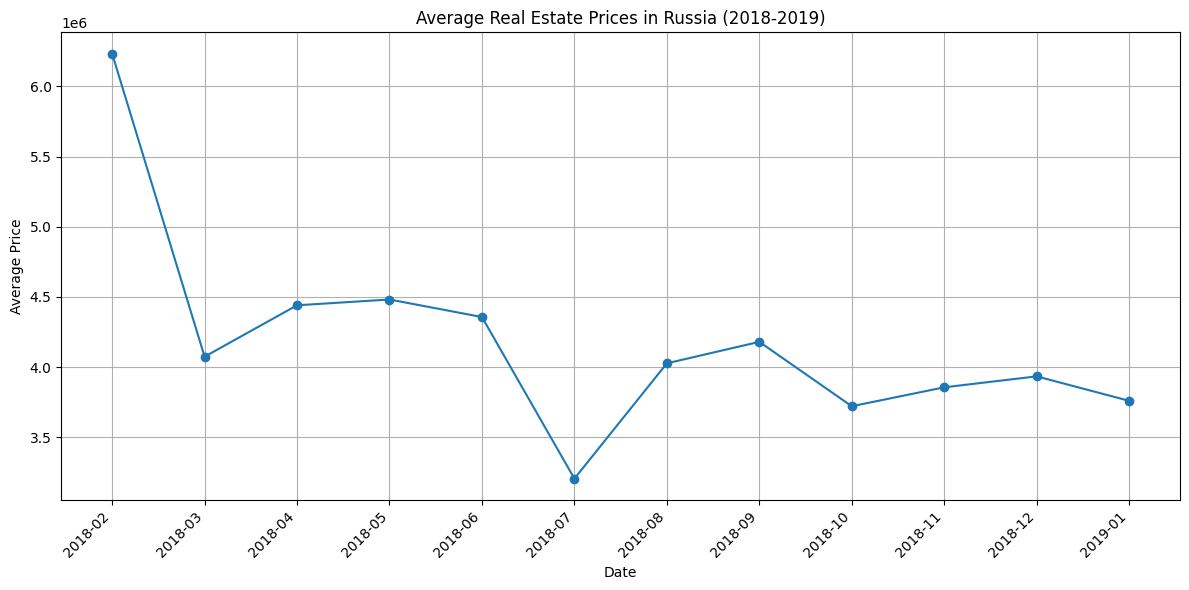

In [8]:
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named 'data'
# If not, you can load it using: data = pd.read_csv('Russia Real Estate 2018-2019.csv')

# Convert the 'date' and 'time' columns to datetime data type
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'])

# Ensure 'price' remains as a numeric data type for plotting purposes
data['price'] = data['price'].astype('int')

# Group the data by month and calculate the average price for each month
average_prices = data.groupby(data['date'].dt.to_period('M'))['price'].mean()

# Convert the PeriodIndex to string representation for plotting
average_prices.index = average_prices.index.astype(str)

# Create a well-designed plot
plt.figure(figsize=(12, 6))
plt.plot(average_prices.index, average_prices.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Real Estate Prices in Russia (2018-2019)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Which factors have the most significant impact on real estate prices?

# Average Price Distribution:

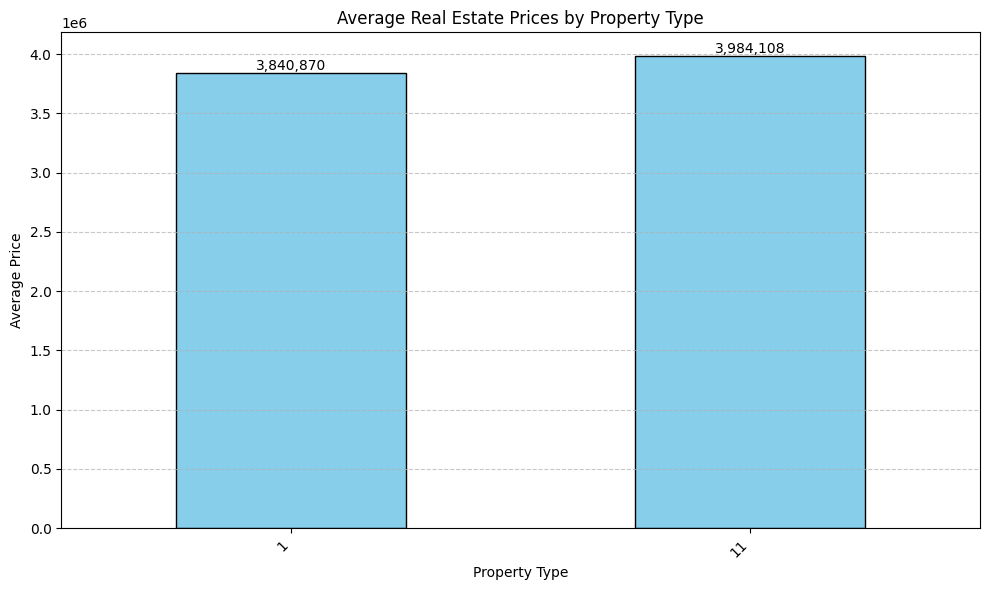

In [9]:
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named 'data'
# If not, you can load it using: data = pd.read_csv('Russia Real Estate 2018-2019.csv')

# Calculate the average price for each property type
average_prices_by_type = data.groupby('object_type')['price'].mean()

# Create a bar plot to visualize the average price for each property type
plt.figure(figsize=(10, 6))
average_prices_by_type.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Real Estate Prices by Property Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with its corresponding value
for index, value in enumerate(average_prices_by_type):
    plt.text(index, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()

# regional differences in real estate prices.

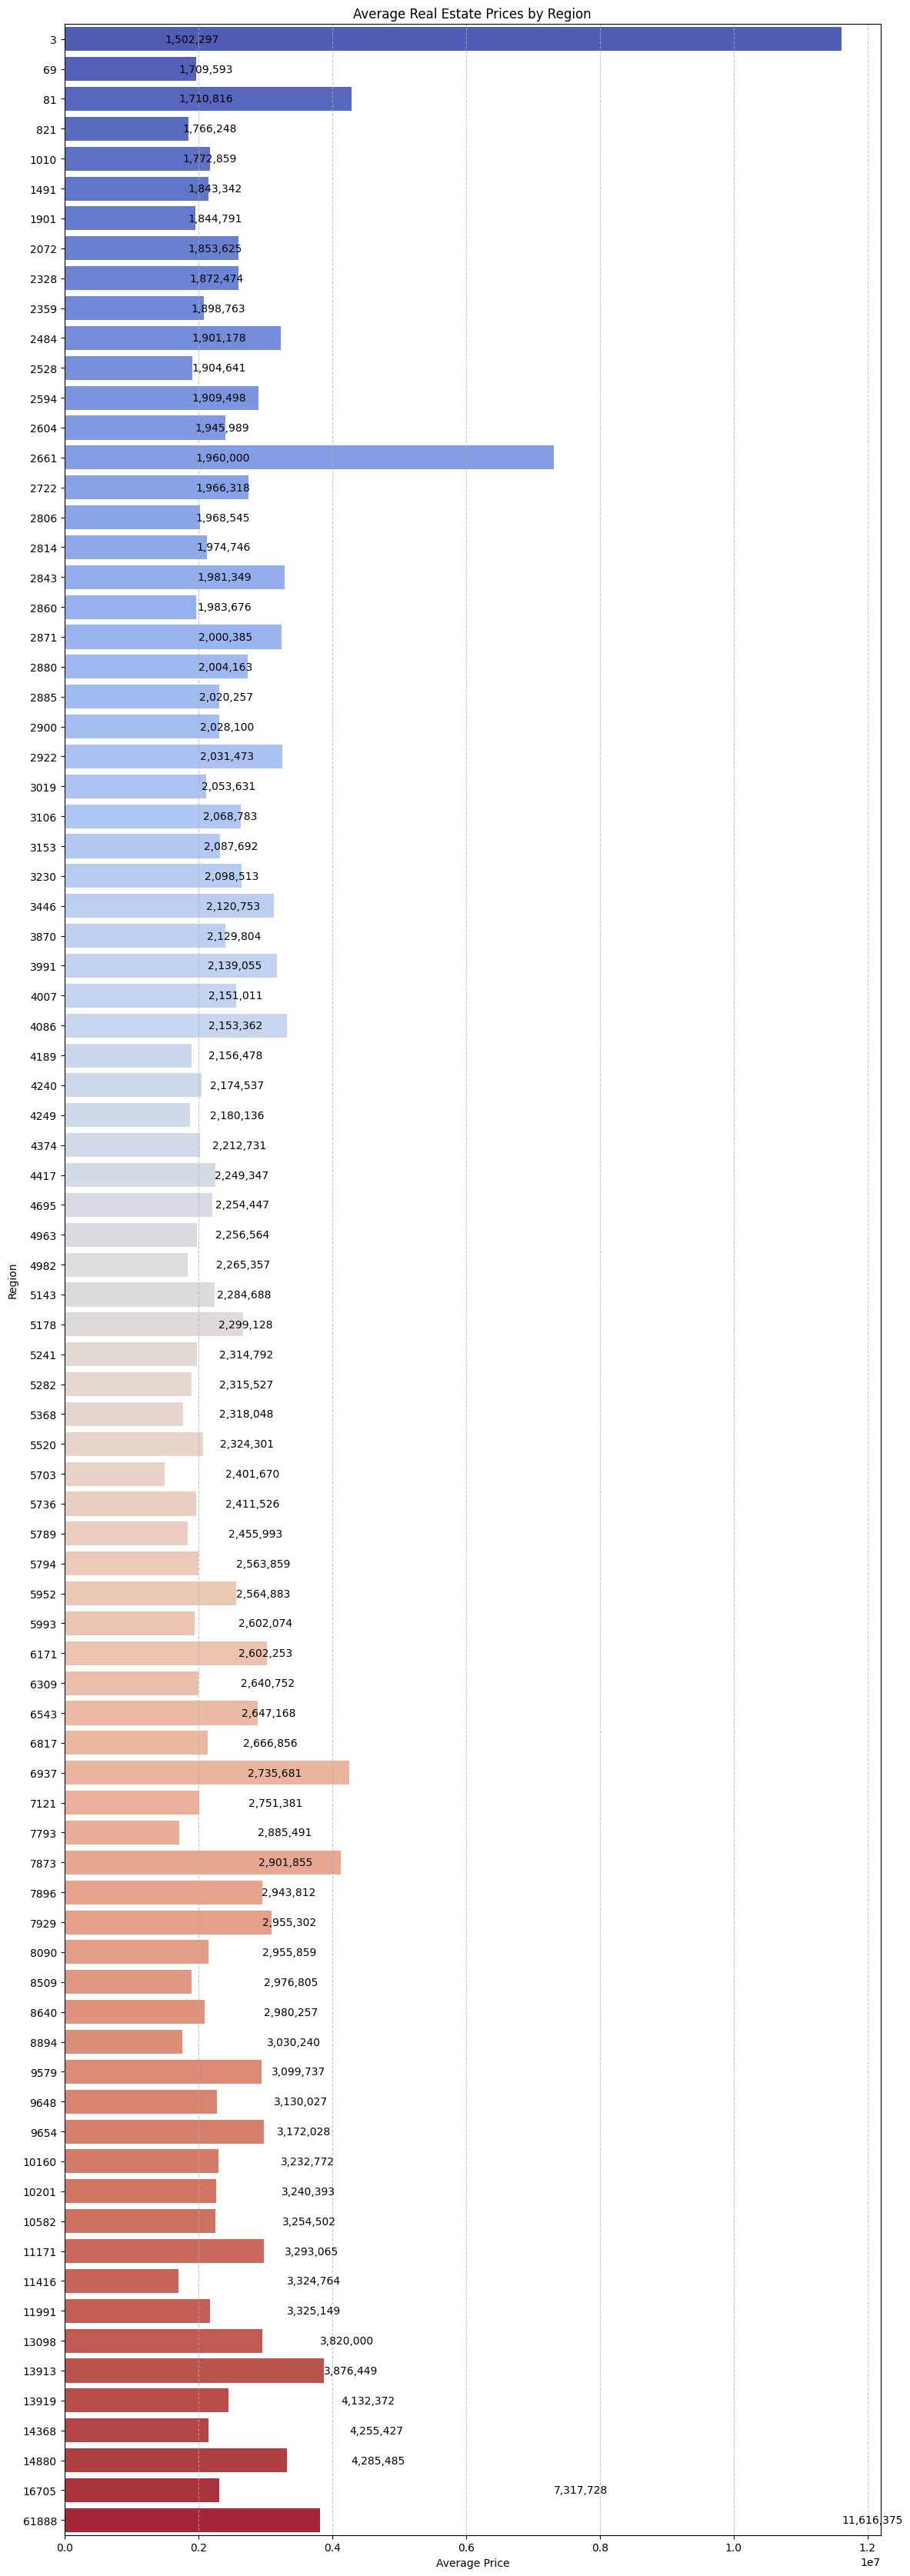

In [10]:
import seaborn as sns

# Assuming your dataset is loaded into a DataFrame named 'data'
# If not, you can load it using: data = pd.read_csv('your_data.csv')

# Calculate the average price for each region
average_prices_by_region = data.groupby('region')['price'].mean().reset_index()

# Sort the regions by average price in ascending order
average_prices_by_region = average_prices_by_region.sort_values(by='price')

# Create a color palette for the bar plot
palette = sns.color_palette('coolwarm', n_colors=len(average_prices_by_region))

# Set the figure size and adjust the spacing between the bars
plt.figure(figsize=(12, len(average_prices_by_region) * 0.4))  # Increase the height based on the number of regions
sns.barplot(x='price', y='region', data=average_prices_by_region, palette=palette)
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.title('Average Real Estate Prices by Region')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate each bar with its corresponding value
for index, value in enumerate(average_prices_by_region['price']):
    plt.text(value, index, f'{value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# What are the most common building types and room counts in the dataset?

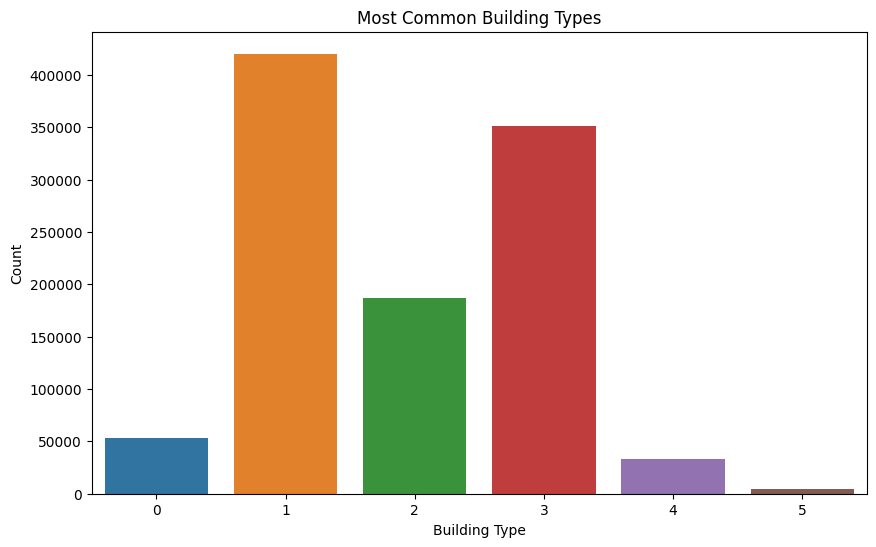

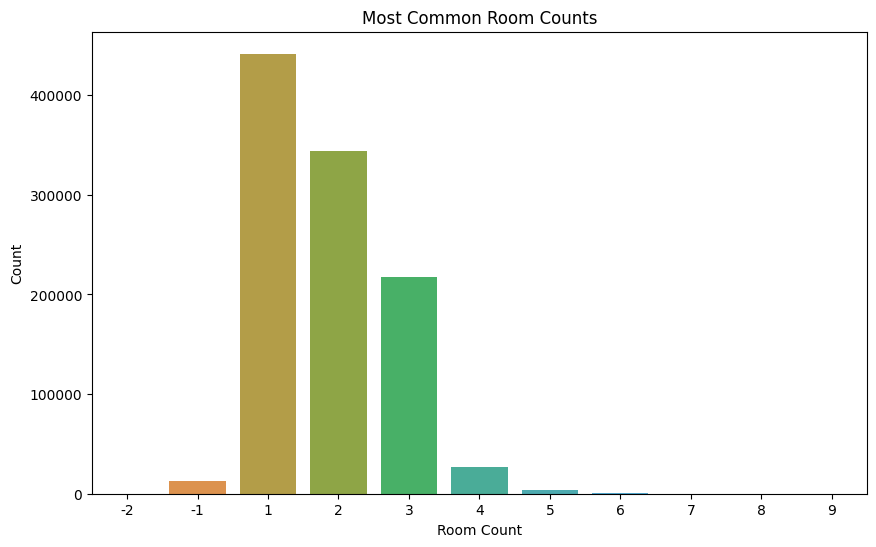

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Most common building types
common_building_types = data['building_type'].value_counts().reset_index()
common_building_types.columns = ['Building Type', 'Count']

# Bar plot for most common building types
plt.figure(figsize=(10, 6))
sns.barplot(data=common_building_types, x='Building Type', y='Count')
plt.title('Most Common Building Types')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.show()

# Most common room counts
common_room_counts = data['rooms'].value_counts().reset_index()
common_room_counts.columns = ['Room Count', 'Count']

# Bar plot for most common room counts
plt.figure(figsize=(10, 6))
sns.barplot(data=common_room_counts, x='Room Count', y='Count')
plt.title('Most Common Room Counts')
plt.xlabel('Room Count')
plt.ylabel('Count')
plt.show()